<h1>Runge Kutta 4º order for ODE system</h1> 

In [ ]:
'''
dP/dr = f(r, P(r), M(r))    P(r0) = P0
dM/dr = g(r, P(r), M(r))    M(x0) = M0

k1 = h*f(rn, Pn, Mn)
l1 = h*g(rn, Pn, Mn)

k2 = h*f(rn + h/2, Pn + k1/2, Mn + l1/2)
l2 = h*g(rn + h/2, Pn + k1/2, Mn + l1/2)


k3 = h*f(rn + h/2, Pn + k2/2, Mn + l2/2)
l3 = h*g(rn + h/2, Pn + k2/2, Mn + l2/2)

k4 = h*f(rn + h, Pn + k3, Mn + l3)
l4 = h*g(rn + h, Pn + k3, Mn + l3)

k = (1/6) *(k1 + 2k2 + 2k3 + k4)
l = (1/6) *(l1 + 2l2 + 2l3 + l4)

rn+1 = rn + h
Pn+1 = Pn + k
Mn+1 = Mn + l
'''

<h1>Anã Branca</h1>

In [ ]:
'''
dP/dr = -(alfa*(P**(1/gama))*M)/(r**2)
dM/dr = beta*(r**2)*(P**(1/gama))

r(0) = 0.0000001
P(0) e [10^-16,10^-14]
M(0) = 0

'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 10000                         #Número de pontos

<h1>Caso Relativístico</h1>

In [3]:
             #Passo de integração
#h = 0.4841                       #P[0] = 10E-14
h = 0.86008919                   #P[0] = 10E-15
#h = 1.508151                      #P[0] = 10E-16

               #Constantes
alfa = 1.473                      
beta = 52.46
gama = 4/3 
G = 6.67E-11
Msol = 1.9891E+30                  #Kg
Rsol = 695700                      #Km

<h1>Caso não-Relativístico</h1>

In [ ]:
            #Passo de integração
#h =                                 #P[0] = 10E-15
h = 1.336139                         #P[0] = 10E-16

                #Constantes
alfa = 0.05 
beta = 0.005924
gama = 5/3 
G = 6.67E-11
Msol = 1.9891E+30                  #Kg
Rsol = 695700                      #Km

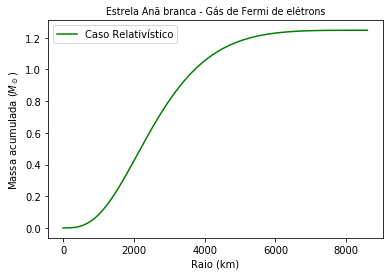

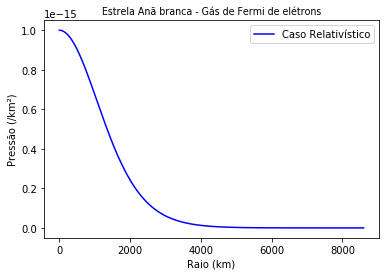

In [4]:
def f(r,P,M):
    return -(alfa*(P**(1/gama))*M)/(r**2)

def g(r,P,M):
    return beta*(r**2)*(P**(1/gama))

r = np.empty(n)                   #Arrays vazios para preencher no laço
P = np.empty(n)
M = np.empty(n)


r[0] = 0.00000000000000001        #Condições Iniciais
P[0] = 10**(-15)
M[0] = 0


def rk4():                        #Runge Kutta rotina
    for i in range(n-1):

        k1 = h*f(r[i], P[i], M[i])
        l1 = h*g(r[i], P[i], M[i])

        k2 = h*f(r[i] + h/2, P[i] + k1/2, M[i] + l1/2)
        l2 = h*g(r[i] + h/2, P[i] + k1/2, M[i] + l1/2)

        k3 = h*f(r[i] + h/2, P[i] + k2/2, M[i] + l2/2)
        l3 = h*g(r[i] + h/2, P[i] + k2/2, M[i] + l2/2)

        k4 = h*f(r[i] + h, P[i] + k3, M[i] + l3)
        l4 = h*g(r[i] + h, P[i] + k3, M[i] + l3)

        k = (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        l = (1/6)*(l1 + 2*l2 + 2*l3 + l4)

        r[i+1] = r[i] + h
        P[i+1] = P[i] + k
        M[i+1] = M[i] + l
    
    df_r = pd.DataFrame(r)                                            #Convertendo np.array para pandas df
    df_r.to_csv('r.csv', index=False)                                 #Convertendo pandas df para .csv
    
    df_P = pd.DataFrame(P)                                            
    df_P.to_csv('P.csv', index=False)
    
    df_M = pd.DataFrame(M)                                            
    df_M.to_csv('M.csv', index=False)
    
    rM = pd.concat([df_r,df_M], axis=1)
    rM.to_csv('rM.csv', index=False)
    
    rP = pd.concat([df_r,df_P], axis=1)
    rP.to_csv('rP.csv', index=False)

    
    return r,M,P
        
rk4()

plt.figure(1)
plt.plot(r,M, color = 'green', label = 'Caso Relativístico')
plt.xlabel('Raio (km)')
plt.ylabel(r'Massa acumulada $(M_\odot$)')
plt.title('Estrela Anã branca - Gás de Fermi de elétrons', fontsize = 9.5)
plt.legend()
plt.savefig('rM_15rel.png')


plt.figure(2)
plt.plot(r,P, color = 'blue', label = 'Caso Relativístico')
plt.xlabel('Raio (km)')
plt.ylabel('Pressão (/km²)')
plt.title('Estrela Anã branca - Gás de Fermi de elétrons', fontsize = 9.5)
plt.legend()
plt.savefig('rP_15rel.png')


plt.show()

<h1>Estrela de Neutrons</h1>

In [ ]:
'''
r(0) = 0.0000001
P(0) e [10^-16,10^-14]
M(0) = 0

'''

<h1>Caso Relativístico</h1>

<h1>Caso não-Relativístico</h1>

In [ ]:
#FALTA DEFINIR AS FUNÇÕES 

def f(r,P,M):
    return 

def g(r,P,M):
    return 

r = np.empty(n)                   #Arrays vazios para preencher no laço
P = np.empty(n)
M = np.empty(n)


r[0] = 0.00000000000000001        #Condições Iniciais
P[0] = 10**(-16)
M[0] = 0


def rk4():                        #Runge Kutta rotina
    for i in range(n-1):

        k1 = h*f(r[i], P[i], M[i])
        l1 = h*g(r[i], P[i], M[i])

        k2 = h*f(r[i] + h/2, P[i] + k1/2, M[i] + l1/2)
        l2 = h*g(r[i] + h/2, P[i] + k1/2, M[i] + l1/2)

        k3 = h*f(r[i] + h/2, P[i] + k2/2, M[i] + l2/2)
        l3 = h*g(r[i] + h/2, P[i] + k2/2, M[i] + l2/2)

        k4 = h*f(r[i] + h, P[i] + k3, M[i] + l3)
        l4 = h*g(r[i] + h, P[i] + k3, M[i] + l3)

        k = (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        l = (1/6)*(l1 + 2*l2 + 2*l3 + l4)

        r[i+1] = r[i] + h
        P[i+1] = P[i] + k
        M[i+1] = M[i] + l

    df_r = pd.DataFrame(r)                                            #Convertendo np.array para pandas df
    df_r.to_csv('r.csv', index=False)                                 #Convertendo pandas df para .csv
    
    df_P = pd.DataFrame(P)                                            
    df_P.to_csv('P.csv', index=False)
    
    df_M = pd.DataFrame(M)                                            
    df_M.to_csv('M.csv', index=False)
    
    rM = pd.concat([df_r,df_M], axis=1)
    rM.to_csv('rM.csv', index=False)
    
    rP = pd.concat([df_r,df_P], axis=1)
    rP.to_csv('rP.csv', index=False)
    return r,M,P
        
rk4()


plt.plot(r,M)
plt.show()

<h1>Dados Observacionais</h1>

<h2>Anã Branca</h2>

[0.41, 0.44, 0.46, 0.501, 0.53, 0.54, 0.59, 0.602, 0.66, 0.7, 0.74, 0.75, 0.75, 1.0034]
[5843.879999999999, 6957.0, 7652.7, 10435.5, 20871.0, 20871.0, 27828.0, 27828.0, 27828.0, 27828.0, 34785.0, 41742.0, 55656.0, 83484.0]


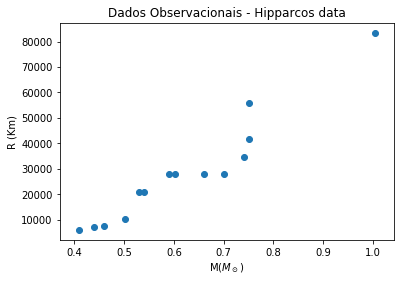

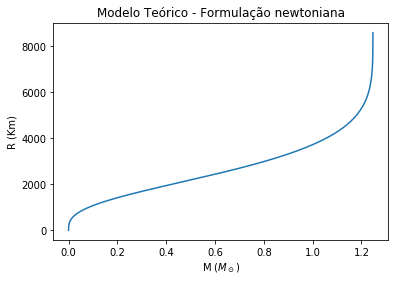

In [5]:
m = []
R = []

dataset = open("dadosobservacionais.csv","r")
for i in dataset:
    x,y = i.split('-')
    m.append(float(x))
    R.append(float(y)*Rsol)

m.sort()
R.sort()

print(m)
print(R)

plt.figure(3)
plt.title("Dados Observacionais - Hipparcos data")
plt.xlabel(r"M($M_\odot$)")
plt.ylabel("R (Km)")
plt.scatter(m,R)

plt.figure(4)
plt.title("Modelo Teórico - Formulação newtoniana")
plt.xlabel(r"M ($M_\odot$)")
plt.ylabel(r"R (Km)")
plt.plot(M,r)
